<h1> Week 8 Homework

<h2>Question 11.1</h2>

Using the crime data set uscrime.txt from Questions 8.2, 9.1, and 10.1, build a regression model using:
1. Stepwise regression
2. Lasso
3. Elastic net

For Parts 2 and 3, remember to scale the data first – otherwise, the regression coefficients will be on different scales and the constraint won’t have the desired effect. For Parts 2 and 3, use the glmnet function in R.

Notes on R: <br>
• For the elastic net model, what we called λ in the videos, glmnet calls “alpha”; you can get a range of results by varying alpha from 1 (lasso) to 0 (ridge regression) and, of course, other values of alpha in between.<br>
• In a function call like glmnet(x,y,family=”mgaussian”,alpha=1) the predictors x need to be in R’s matrix format, rather than data frame format. You can convert a data frame to a matrix using as.matrix – for example, x <- as.matrix(data\[,1:n-1\]). Rather than specifying a value of T, glmnet returns models for a variety of values of T. 

In [1]:
# loading the dataset
# READ DATASET as DataFrame
df <- read.table("uscrime.txt", header = TRUE, sep = "\t")
# Display Data
head(df)
cat("No. of cols:", ncol(df), "\n")
cat("No. of rows:", nrow(df))

,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>
1,15.1,1,9.1,5.8,5.6,0.510,95.0,33,30.1,0.108,4.1,3940,26.1,0.084602,26.2011,791
2,14.3,0,11.3,10.3,9.5,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.029599,25.2999,1635
3,14.2,1,8.9,4.5,4.4,0.533,96.9,18,21.9,0.094,3.3,3180,25.0,0.083401,24.3006,578
4,13.6,0,12.1,14.9,14.1,0.577,99.4,157,8.0,0.102,3.9,6730,16.7,0.015801,29.9012,1969
5,14.1,0,12.1,10.9,10.1,0.591,98.5,18,3.0,0.091,2.0,5780,17.4,0.041399,21.2998,1234
6,12.1,0,11.0,11.8,11.5,0.547,96.4,25,4.4,0.084,2.9,6890,12.6,0.034201,20.9995,682


No. of cols: 16 
No. of rows: 47

<p><p style="page-break-after:always;"></p></p>

<b> Greedy Methods Analysis </b> <br>
Stepwise Regression

In [2]:
# Build Full model
full.model <- lm(Crime ~., data = df)
# Stepwise regression model
step.model <- step(full.model, direction = "both", trace = FALSE)
summary(step.model)


Call:
lm(formula = Crime ~ M + Ed + Po1 + M.F + U1 + U2 + Ineq + Prob, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-444.70 -111.07    3.03  122.15  483.30 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6426.10    1194.61  -5.379 4.04e-06 ***
M              93.32      33.50   2.786  0.00828 ** 
Ed            180.12      52.75   3.414  0.00153 ** 
Po1           102.65      15.52   6.613 8.26e-08 ***
M.F            22.34      13.60   1.642  0.10874    
U1          -6086.63    3339.27  -1.823  0.07622 .  
U2            187.35      72.48   2.585  0.01371 *  
Ineq           61.33      13.96   4.394 8.63e-05 ***
Prob        -3796.03    1490.65  -2.547  0.01505 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 195.5 on 38 degrees of freedom
Multiple R-squared:  0.7888,	Adjusted R-squared:  0.7444 
F-statistic: 17.74 on 8 and 38 DF,  p-value: 1.159e-10


<p><p style="page-break-after:always;"></p></p>

Forward Selection

In [3]:
# Forward Selection regression model
forward.model <- step(full.model, direction = "both", trace = FALSE)
summary(forward.model)


Call:
lm(formula = Crime ~ M + Ed + Po1 + M.F + U1 + U2 + Ineq + Prob, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-444.70 -111.07    3.03  122.15  483.30 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6426.10    1194.61  -5.379 4.04e-06 ***
M              93.32      33.50   2.786  0.00828 ** 
Ed            180.12      52.75   3.414  0.00153 ** 
Po1           102.65      15.52   6.613 8.26e-08 ***
M.F            22.34      13.60   1.642  0.10874    
U1          -6086.63    3339.27  -1.823  0.07622 .  
U2            187.35      72.48   2.585  0.01371 *  
Ineq           61.33      13.96   4.394 8.63e-05 ***
Prob        -3796.03    1490.65  -2.547  0.01505 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 195.5 on 38 degrees of freedom
Multiple R-squared:  0.7888,	Adjusted R-squared:  0.7444 
F-statistic: 17.74 on 8 and 38 DF,  p-value: 1.159e-10


<p><p style="page-break-after:always;"></p></p>

Backward Elimination

In [4]:
# Backward Elimination regression model
backward.model <- step(full.model, direction = "both", trace = FALSE)
summary(backward.model)


Call:
lm(formula = Crime ~ M + Ed + Po1 + M.F + U1 + U2 + Ineq + Prob, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-444.70 -111.07    3.03  122.15  483.30 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6426.10    1194.61  -5.379 4.04e-06 ***
M              93.32      33.50   2.786  0.00828 ** 
Ed            180.12      52.75   3.414  0.00153 ** 
Po1           102.65      15.52   6.613 8.26e-08 ***
M.F            22.34      13.60   1.642  0.10874    
U1          -6086.63    3339.27  -1.823  0.07622 .  
U2            187.35      72.48   2.585  0.01371 *  
Ineq           61.33      13.96   4.394 8.63e-05 ***
Prob        -3796.03    1490.65  -2.547  0.01505 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 195.5 on 38 degrees of freedom
Multiple R-squared:  0.7888,	Adjusted R-squared:  0.7444 
F-statistic: 17.74 on 8 and 38 DF,  p-value: 1.159e-10


<br>
Note All 3 greedy methods reached the same variables (M + Ed + Po1 + M.F + U1 + U2 + Ineq + Prob) and thus model.

<p><p style="page-break-after:always;"></p></p>

10 fold cross validating the Stepwise model without Optimization

Loading required package: lattice


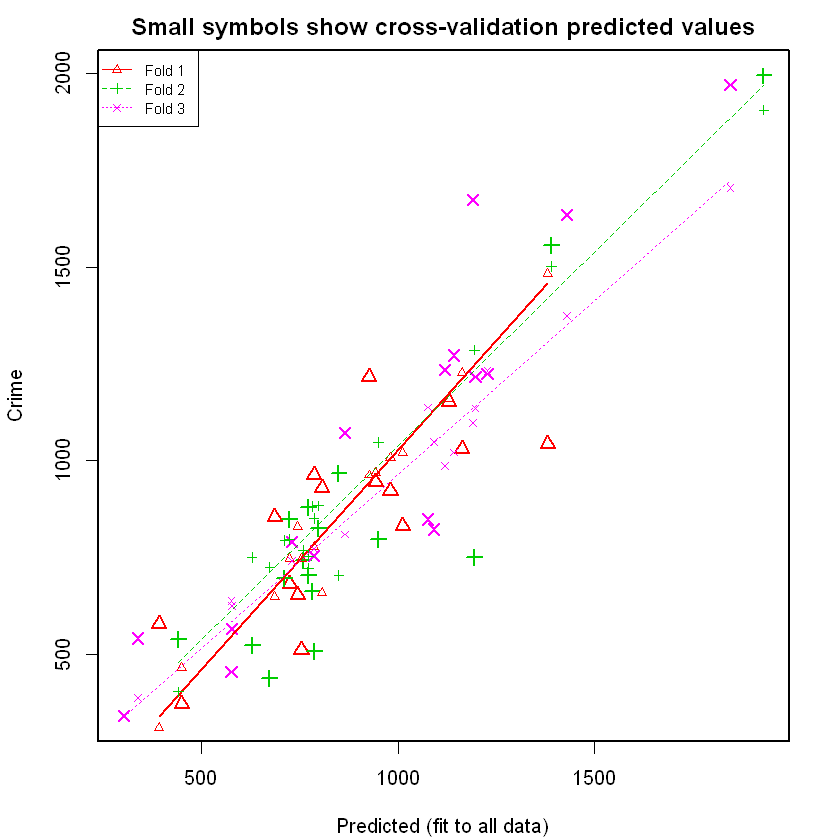

In [5]:
options(warn=-1)
library(DAAG)
cv.step.model <- cv.lm(Crime~M+Ed+Po1+M.F+U1+U2+Ineq+Prob, data = df, printit=FALSE)
# total sum of squared differences between data and its mean (SSE Total)
SStot <- sum((df$Crime - mean(df$Crime))^2)
# Calculate mean squared error, times number of data points, gives sum of squared errors
SSres_cv <- attr(cv.step.model,"ms")*nrow(df)
# Calculate CV R squared 
CV_R2 <- (1 - SSres_cv/SStot)

In [6]:
cat("Stepwise model cross validated R2", round(CV_R2,3))

Stepwise model cross validated R2 0.663

<p><p style="page-break-after:always;"></p></p>

We can further refine the model utilizing the p-value of the coefficients (threshold p-value <0.05)

In [7]:
step.model.opt <- lm(Crime~M+Ed+Po1+U2+Ineq+Prob, data=df)
summary(step.model.opt)


Call:
lm(formula = Crime ~ M + Ed + Po1 + U2 + Ineq + Prob, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-470.68  -78.41  -19.68  133.12  556.23 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5040.50     899.84  -5.602 1.72e-06 ***
M             105.02      33.30   3.154  0.00305 ** 
Ed            196.47      44.75   4.390 8.07e-05 ***
Po1           115.02      13.75   8.363 2.56e-10 ***
U2             89.37      40.91   2.185  0.03483 *  
Ineq           67.65      13.94   4.855 1.88e-05 ***
Prob        -3801.84    1528.10  -2.488  0.01711 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 200.7 on 40 degrees of freedom
Multiple R-squared:  0.7659,	Adjusted R-squared:  0.7307 
F-statistic: 21.81 on 6 and 40 DF,  p-value: 3.418e-11


<p><p style="page-break-after:always;"></p></p>

10 fold cross validating the Stepwise model after Optimization

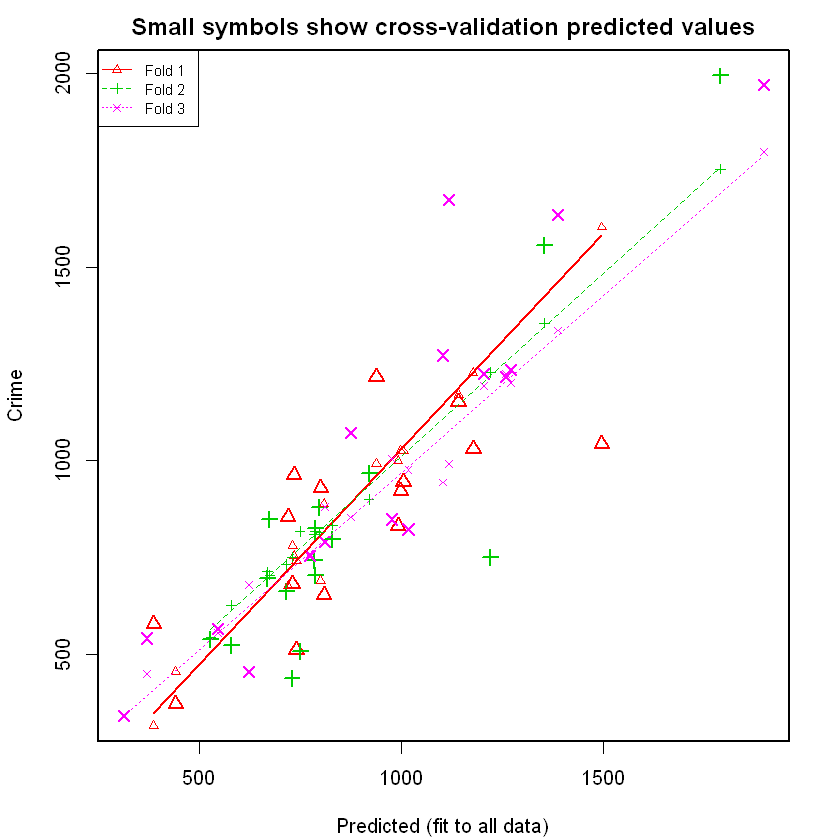

In [8]:
options(warn=-1)
cv.step.model.opt <- cv.lm(Crime~M+Ed+Po1+U2+Ineq+Prob, data = df, printit=FALSE)
# total sum of squared differences between data and its mean (SSE Total)
SStot <- sum((df$Crime - mean(df$Crime))^2)
# Calculate mean squared error, times number of data points, gives sum of squared errors
SSres_cv <- attr(cv.step.model.opt,"ms")*nrow(df)
# Calculate CV R squared 
CV_R2 <- (1 - SSres_cv/SStot)

In [9]:
cat("Optimized Stepwise model cross validated R2", round(CV_R2,3))

Optimized Stepwise model cross validated R2 0.677

<p><p style="page-break-after:always;"></p></p>

<b> Greedy Methods Conclusions </b> <br>
1. All 3 greedy methods reached the same variables (M + Ed + Po1 + M.F + U1 + U2 + Ineq + Prob). <br>
2. Further optmiization based on factors p-value reduced the number of model parameters to 6 (M + Ed + Po1 + U2 + Ineq + Prob). <br>

Note that step functions is defined as: Select a formula-based model by AIC.

| Model | R2 | Adj-R2 | R2 cross-validated |
| --- | --- | --- | --- |
|Stepwise Model | 0.789 | 0.744 | 0.663 |
|Optimized Stepwise Model | 0.766 | 0.731 | 0.677 |

<p><p style="page-break-after:always;"></p></p>

<b> LASSO Approach </b> <br>

Methodology: <br>
For all Elastic net models, including LASSO model, <br>
1. The predictors were scaled and centered (response was unchanged)
2. For any value of alpha, corss validation was used to find the optimum lambda value that minimizes the MSE.
3. 3 sets of different values of training R2, Adjusted R2 and Cross-validated R2 were reported as described below. <br>

| Name | Description |
| --- | --- |
| Original Model | Values driven from the scaled LASSO model evaluated using glmnet functions. |
| Rebuilt Model| Values based on a re-built linear regression model based on the selected variables (non-zero coffceints) by the model |
| Optimized Rebuilt Model | Further optimizing the above model based on a p-value threshold. |

In [10]:
options(warn=-1)
# Scale the data
scaled_df <- scale(df, center = TRUE, scale = TRUE)
# Convert predictors to Matrix
X <- as.matrix(scaled_df[,1:15])
Y <- df$Crime

In [11]:
options(warn=-1)
# install.packages('glmnet')
library(glmnet)

Loading required package: Matrix
Loaded glmnet 4.1-1


<p><p style="page-break-after:always;"></p></p>

A 10-fold (cv.glmnet default) cross-validation was used to return the optimum value of lambda (alpha in the course videos)


Call:  cv.glmnet(x = X, y = Y, alpha = 1) 

Measure: Mean-Squared Error 

    Lambda Index Measure   SE Nonzero
min  9.238    37   69181 6832      11
1se 30.961    24   75672 6816       6

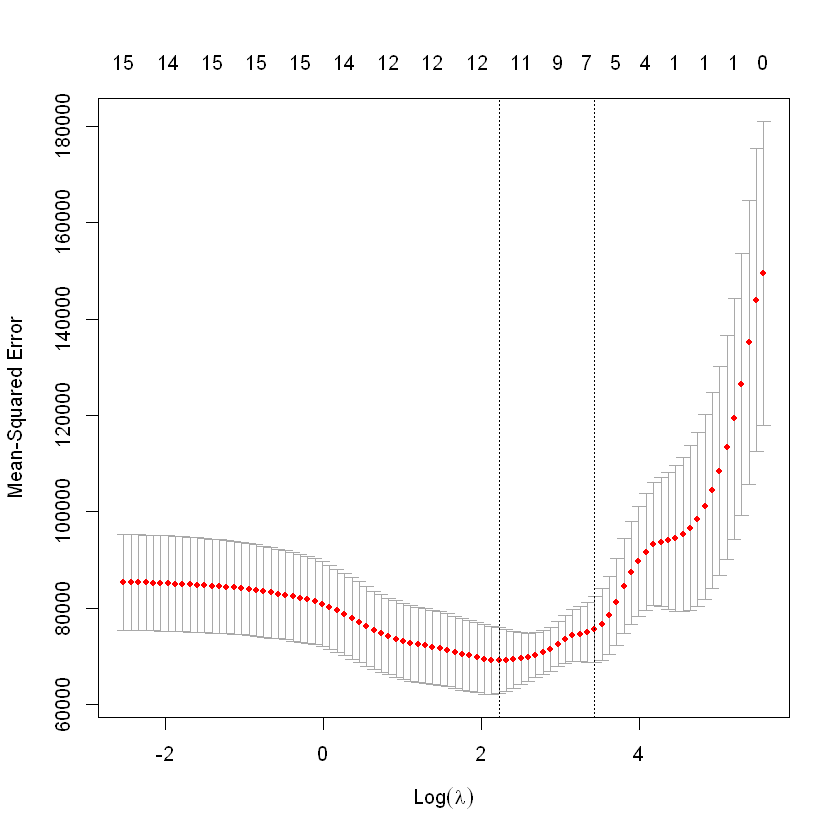

In [12]:
# Fix seed number
set.seed(1)
# LASSO Approach
cv.lasso.model <- cv.glmnet(X, Y, alpha=1)
cv.lasso.model
plot(cv.lasso.model)

From the chart, the optimum value of lambda is 9.2 or on the chart ln(lambda) = 2.2 minimizes the MSE

<p><p style="page-break-after:always;"></p></p>

LASSO model Corss Validated R2 at Optimum Lambda 0.538

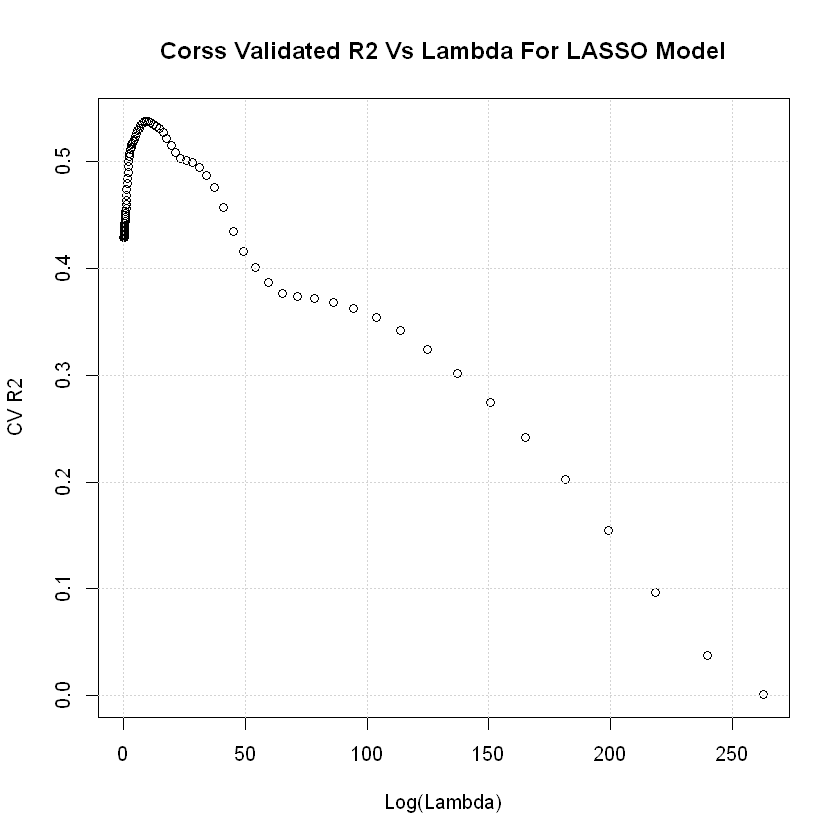

In [13]:
# Plot Cross validated R2 versus different values of Lambda
CV_LASSO_R2 = 1 - cv.lasso.model$cvm/var(Y)
# Find Corss Validated R2 at Optimum Lambda
cat("LASSO model Corss Validated R2 at Optimum Lambda", round(max(CV_LASSO_R2),3))
plot(cv.lasso.model$lambda,CV_LASSO_R2, xlab="Log(Lambda)", ylab="CV R2")
title("Corss Validated R2 Vs Lambda For LASSO Model")
grid()

From the Chart, At optimum ln(lambda) 9.2, the maximum cross validated R2 is 0.538

<p><p style="page-break-after:always;"></p></p>

In [14]:
# Find the optimum lambda
optimium_lambda <- cv.lasso.model$lambda.min
# Build the LASSO model
lasso.model.coefs <- glmnet(X, Y, alpha  = 1, lambda = optimium_lambda)
a0 <- lasso.model.coefs$a0
coefs <- lasso.model.coefs$beta
cat("Number of variables with non-Zero coefs:", sum(coefs[,1]!=0))
"Scaled Intercept"
round(a0,2)
"Scaled Coefficients"
coefs

Number of variables with non-Zero coefs: 11

[1] "Scaled Intercept"

s0 
905.09

[1] "Scaled Coefficients"

15 x 1 sparse Matrix of class "dgCMatrix"
               s0
M       89.224469
So      21.009609
Ed     137.784802
Po1    305.115197
Po2      .       
LF       .       
M.F     55.005220
Pop      .       
NW       6.278334
U1     -35.881758
U2      71.390032
Wealth   6.022124
Ineq   192.827661
Prob   -83.370204
Time     .       

From the above data, 4 variables were removed by the LASSO approach for variable selection. <br>
11 variables were kept as important for the model as compared to 8 as defined by the greedy methods

In [15]:
# Find LASSO Model R2 at Optimum Lambda For training data
R2 <- lasso.model.coefs$dev.ratio
cat("LASSO model R2 at Optimum Lambda on training Data", round(R2,3), "\n")
# Find LASSO Model R2 at Optimum Lambda For training data
adj_R2 <- 1 - (1-R2)*(47-1)/(47-11-1) 
cat("LASSO model Adjusted R2 at Optimum Lambda on training Data", round(adj_R2,3), "\n")
# LASSO model Corss Validated R2 at Optimum Lambda
cat("LASSO model Corss Validated R2 at Optimum Lambda", round(max(CV_LASSO_R2),3))

LASSO model R2 at Optimum Lambda on training Data 0.773 
LASSO model Adjusted R2 at Optimum Lambda on training Data 0.701 
LASSO model Corss Validated R2 at Optimum Lambda 0.538

<p><p style="page-break-after:always;"></p></p>

An alternative Method is to use the output of the LASSO model analysis and Rebuild a Linear Regression model.

In [16]:
# Building the LASSO model using selected coefs
lasso.model <- lm(Crime~M+So+Ed+Po1+M.F+NW+U1+U2+Wealth+Ineq+Prob, data = df)
summary(lasso.model)


Call:
lm(formula = Crime ~ M + So + Ed + Po1 + M.F + NW + U1 + U2 + 
    Wealth + Ineq + Prob, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-408.38  -96.14   -1.39  114.80  454.53 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.757e+03  1.313e+03  -5.147 1.03e-05 ***
M            9.148e+01  3.893e+01   2.350  0.02454 *  
So           3.335e+01  1.237e+02   0.270  0.78905    
Ed           1.746e+02  5.589e+01   3.124  0.00357 ** 
Po1          9.277e+01  2.019e+01   4.596 5.41e-05 ***
M.F          2.189e+01  1.453e+01   1.506  0.14101    
NW           1.549e+00  5.559e+00   0.279  0.78209    
U1          -5.248e+03  3.600e+03  -1.458  0.15380    
U2           1.667e+02  7.853e+01   2.123  0.04089 *  
Wealth       7.626e-02  9.737e-02   0.783  0.43878    
Ineq         6.693e+01  2.022e+01   3.310  0.00217 ** 
Prob        -3.854e+03  1.770e+03  -2.177  0.03627 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R

<p><p style="page-break-after:always;"></p></p>

10 fold cross validating the LASSO model without Optimization

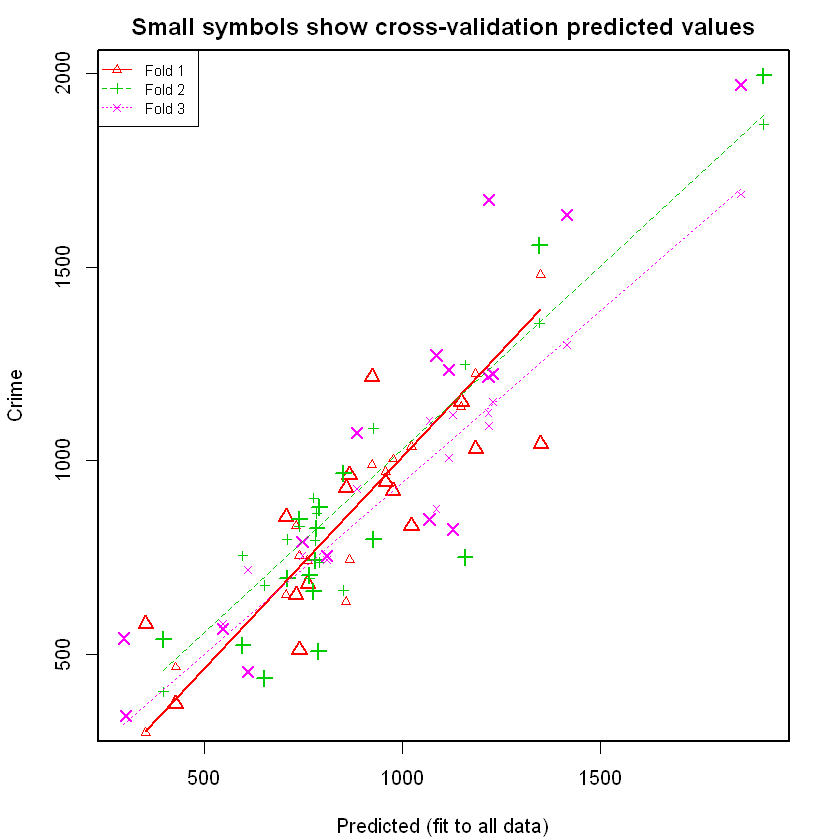

In [17]:
options(warn=-1)
# Cross Validating the model
cv.lasso.model <- cv.lm(Crime~M+So+Ed+Po1+M.F+NW+U1+U2+Wealth+Ineq+Prob, data = df, printit=FALSE)
# total sum of squared differences between data and its mean (SSE Total)
SStot <- sum((df$Crime - mean(df$Crime))^2)
# Calculate mean squared error, times number of data points, gives sum of squared errors
SSres_cv <- attr(cv.lasso.model,"ms")*nrow(df)
# Calculate CV R squared 
CV_R2 <- (1 - SSres_cv/SStot)

In [18]:
cat("Lasso model cross validated R2", round(CV_R2,3))

Lasso model cross validated R2 0.619

<p><p style="page-break-after:always;"></p></p>

We can further refine the model utilizing the p-value of the coefficients (threshold p-value <0.05)

In [19]:
# removing the variables with p > 0.05
lasso.model.opt <- lm(Crime~M+Ed+Po1+U2+Ineq+Prob, data = df)
summary(lasso.model.opt)


Call:
lm(formula = Crime ~ M + Ed + Po1 + U2 + Ineq + Prob, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-470.68  -78.41  -19.68  133.12  556.23 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5040.50     899.84  -5.602 1.72e-06 ***
M             105.02      33.30   3.154  0.00305 ** 
Ed            196.47      44.75   4.390 8.07e-05 ***
Po1           115.02      13.75   8.363 2.56e-10 ***
U2             89.37      40.91   2.185  0.03483 *  
Ineq           67.65      13.94   4.855 1.88e-05 ***
Prob        -3801.84    1528.10  -2.488  0.01711 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 200.7 on 40 degrees of freedom
Multiple R-squared:  0.7659,	Adjusted R-squared:  0.7307 
F-statistic: 21.81 on 6 and 40 DF,  p-value: 3.418e-11


<p><p style="page-break-after:always;"></p></p>

10 fold cross validating the LASSO model after Optimization

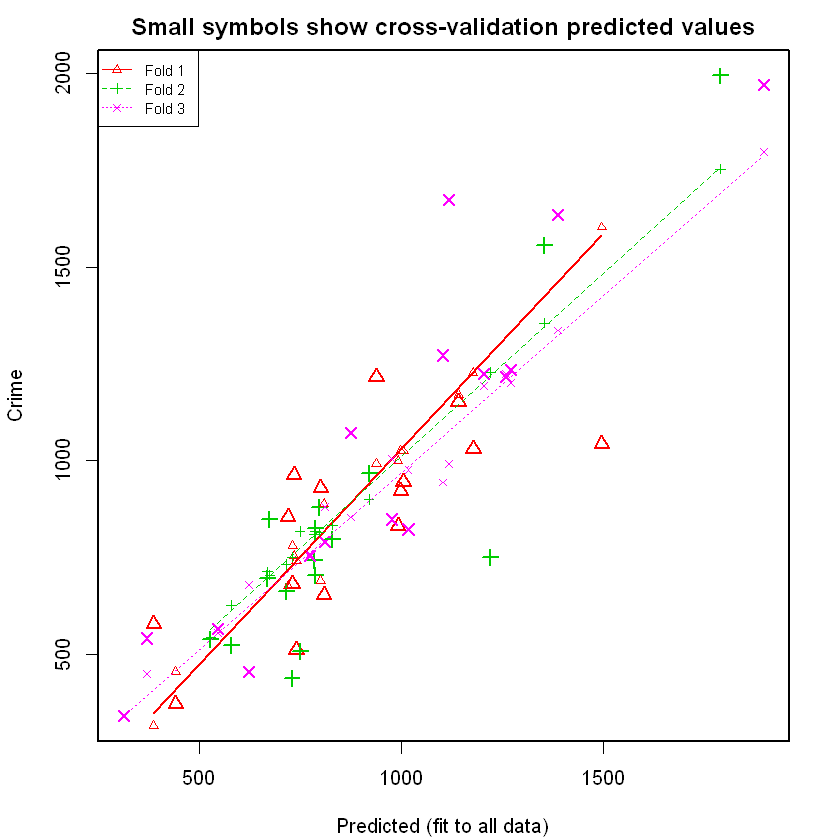

In [20]:
options(warn=-1)
# Cross Validating the model
cv.lasso.model.opt <- cv.lm(Crime~M+Ed+Po1+U2+Ineq+Prob, data = df, printit=FALSE)
# total sum of squared differences between data and its mean (SSE Total)
SStot <- sum((df$Crime - mean(df$Crime))^2)
# Calculate mean squared error, times number of data points, gives sum of squared errors
SSres_cv <- attr(cv.lasso.model.opt,"ms")*nrow(df)
# Calculate CV R squared 
CV_R2 <- (1 - SSres_cv/SStot)

In [21]:
cat("Optimized Lasso model cross validated R2", round(CV_R2,3))

Optimized Lasso model cross validated R2 0.677

<p><p style="page-break-after:always;"></p></p>

<b> Summary of LASSO Model </b> <br>
1. LASSO Model defined 11 factors with non-zero coefficients.
2. Rebuilding the Model using the 11 selected factors then optimizing the model based on coffceints p-value reuslted in an improved cross validated R2.
3. Optimized LASSO model (rebuilt) reached the same 6 variables (M+Ed+Po1+U2+Ineq+Prob) as the optimized Greedy methods approach

| Model | R2 | Adj-R2 | R2 cross-validated |
| --- | --- | --- | --- |
|Stepwise Model | 0.789 | 0.744 | 0.663 |
|Optimized Stepwise Model | 0.766 | 0.731 | 0.677 |
|LASSO Model | 0.773 | 0.701 | 0.538 |
|Rebuilt LASSO Model | 0.794 | 0.730 | 0.619 |
|Optimized Rebuilt LASSO Model | 0.766 | 0.731 | 0.677 |

<p><p style="page-break-after:always;"></p></p>

<b> Elastic Net Approach </b> <br>
A senstivity analysis was done using the same function and approach as LASSO method (10-fold cross-validation) and find the number of non-Zero coefficients as well as R2 and CV R2 for different values of alpha. <br>
Alpha was ranged from 0 (Ridge Regression) to 1 (LASSO Method) with increments of 0.1

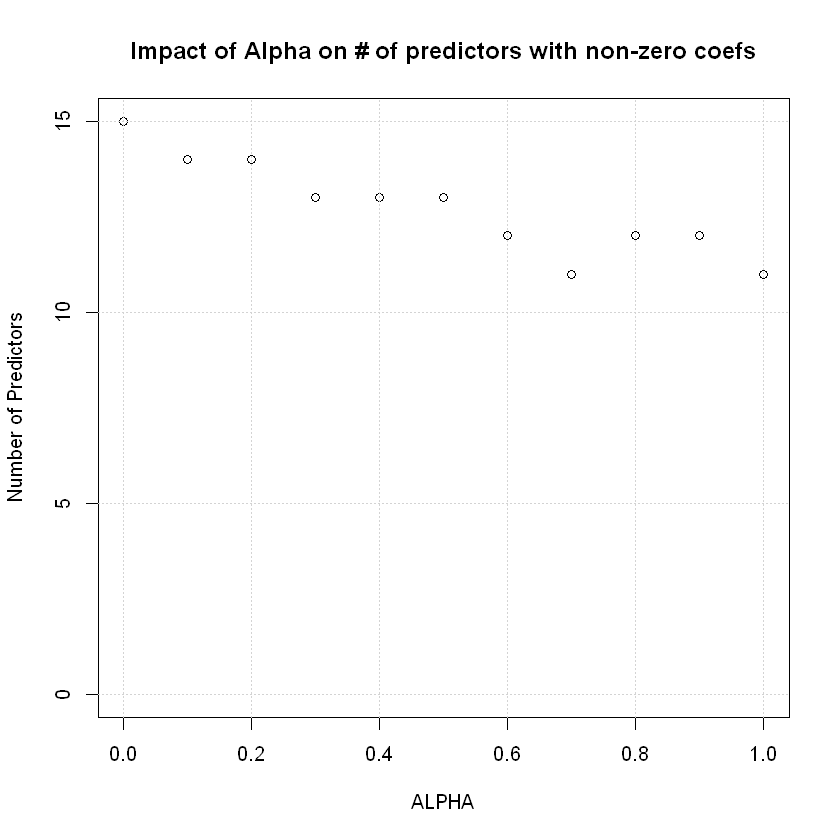

In [22]:
# Elastic Net Model
# Fix seed number
set.seed(10)
# creating vector for alpha sensitivity
alpha_sen <- seq(0,10)/10
# creating vectors to store results
number_predictors <- seq(1,11)
CV_R2_list <- seq(1,11)
R2_list <- seq(1,11)
# sensitivity analysis on alpha values
for (i in seq(1,11)){
    cv.elastic.model <- cv.glmnet(X, Y, alpha=alpha_sen[i])
    optimium_lambda <- cv.elastic.model$lambda.min
    # Find Cross validated R2 versus different values of Lambda
    CV_elastic_R2 = 1 - cv.elastic.model$cvm/var(Y)
    # stor CV R2
    CV_R2_list[i] = max(CV_elastic_R2)
    # build the model using optimized lambda
    elastic.model.coefs <- glmnet(X, Y, alpha  = alpha_sen[i], lambda = optimium_lambda)
    coefs <- elastic.model.coefs$beta
    # store number of predictors
    number_predictors[i] <- sum(coefs[,1]!=0)
    # store training R2
    R2_list[i] <- elastic.model.coefs$dev.ratio
}
plot(alpha_sen, number_predictors, xlab="ALPHA", ylab="Number of Predictors", ylim=c(0,15))
title("Impact of Alpha on # of predictors with non-zero coefs")
grid()

From the plot above, There is a decline in the number of non-zero coefficients preidctors with increasing the alpha factor. <br>
The ridge regression (alpha = 0) shows all 15 predictors to have non-zero coefficients. <br>
At alpha = 1 (LASSO appraoch) we are back to the 11 non-zero coefficients predictors of the LASSO approach above.

<p><p style="page-break-after:always;"></p></p>

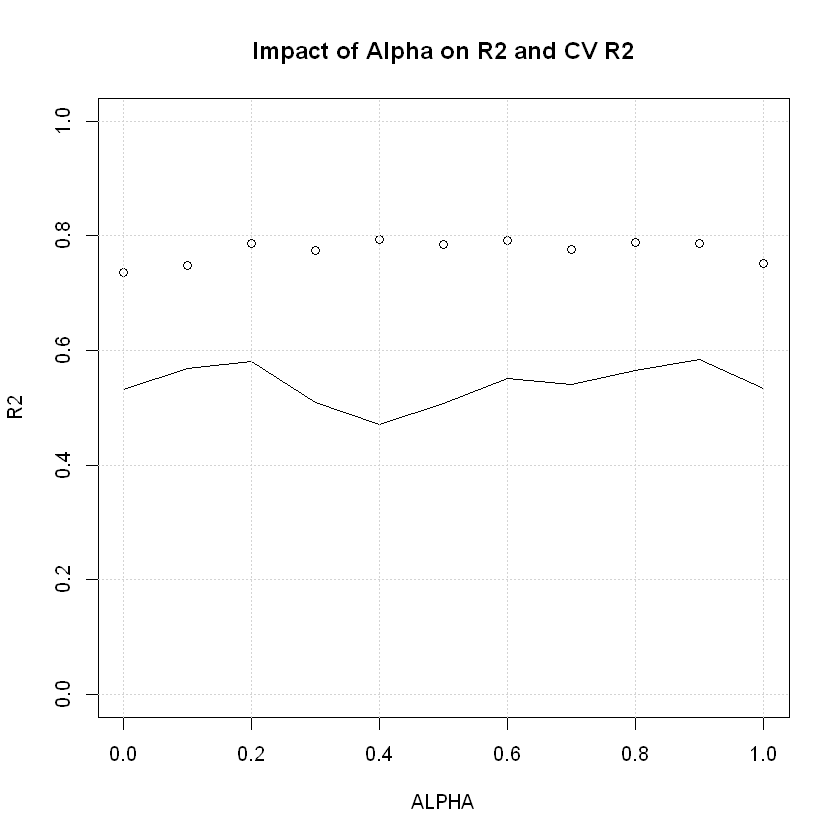

In [23]:
# Plot R2 and Cross Validated R2 for all values of Alpha
plot(alpha_sen, R2_list, ylim=c(0,1), xlab="ALPHA", ylab="R2")
lines(alpha_sen, CV_R2_list)
title("Impact of Alpha on R2 and CV R2")
grid()

From the plot above, There does not seems to be an material change in R2 or cross-validated R2 for the various values of Alpha. I tested different seed numbers and they showed Fluctuations in R2 or CV R2. The relatively small changes in the plot above can be attributed to Random effects benefiting some models than others. <br>
<br>
As a result, An Elastic Net model with Alpha = 0.5 will be built and analyzed for completeness following the same logic as in LASSO model.

<p><p style="page-break-after:always;"></p></p>

<b> Eslatic Net Model (Alpha = 0.5) </b>

In [24]:
set.seed(10)
# Elastic Net model with alpha = 0.5 model
cv.elastic.model <- cv.glmnet(X, Y, alpha=0.5)
cv.elastic.model
optimium_lambda <- cv.elastic.model$lambda.min
elastic.model.coefs <- glmnet(X, Y, alpha  = 0.5, lambda = optimium_lambda)
a0 <- elastic.model.coefs$a0
coefs <- elastic.model.coefs$beta
cat("Number of variables with non-Zero coefs:", sum(coefs[,1]!=0))
"Scaled Intercept"
round(a0,2)
"Scaled Coefficients"
coefs


Call:  cv.glmnet(x = X, y = Y, alpha = 0.5) 

Measure: Mean-Squared Error 

    Lambda Index Measure    SE Nonzero
min   9.63    44   69976 17009      13
1se  74.59    22   84424 19787       7

Number of variables with non-Zero coefs: 13

[1] "Scaled Intercept"

s0 
905.09

[1] "Scaled Coefficients"

15 x 1 sparse Matrix of class "dgCMatrix"
               s0
M       94.895302
So      21.344361
Ed     152.257603
Po1    265.367523
Po2     20.057850
LF       .       
M.F     61.332066
Pop     -5.257144
NW      17.557401
U1     -60.564260
U2      98.648587
Wealth  37.256441
Ineq   210.524065
Prob   -88.358285
Time     .       

In [25]:
# Find Elastic Net Model R2 at Optimum Lambda For training data
R2 <- elastic.model.coefs$dev.ratio
cat("Elastic Net Model (alpha=0.5) R2 at Optimum Lambda on training Data", round(R2,3), "\n")
# Find Elastic Net Model R2 at Optimum Lambda For training data
adj_R2 <- 1 - (1-R2)*(47-1)/(47-11-1) 
cat("Elastic Net Model (alpha=0.5) Adjusted R2 at Optimum Lambda on training Data", round(adj_R2,3), "\n")
# Find Cross validated R2 versus different values of Lambda
CV_elastic_R2 = 1 - cv.elastic.model$cvm/var(Y)
# Elastic Net model Cross Validated R2 at Optimum Lambda
cat("Elastic Net Model (alpha=0.5) Corss Validated R2 at Optimum Lambda", round(max(CV_elastic_R2),3))

Elastic Net Model (alpha=0.5) R2 at Optimum Lambda on training Data 0.785 
Elastic Net Model (alpha=0.5) Adjusted R2 at Optimum Lambda on training Data 0.717 
Elastic Net Model (alpha=0.5) Corss Validated R2 at Optimum Lambda 0.532

<p><p style="page-break-after:always;"></p></p>

In [26]:
# Building the Elastic Net model using selected coefs
elastic.model <- lm(Crime~M+So+Ed+Po1+Po2+M.F+Pop+NW+U1+U2+Wealth+Ineq+Prob, data = df)
summary(elastic.model)


Call:
lm(formula = Crime ~ M + So + Ed + Po1 + Po2 + M.F + Pop + NW + 
    U1 + U2 + Wealth + Ineq + Prob, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-389.63  -94.25    7.83  109.20  491.62 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.169e+03  1.454e+03  -4.243 0.000168 ***
M            8.743e+01  3.964e+01   2.205 0.034514 *  
So           3.440e+01  1.271e+02   0.271 0.788398    
Ed           1.809e+02  5.721e+01   3.163 0.003346 ** 
Po1          1.688e+02  9.667e+01   1.746 0.090115 .  
Po2         -7.692e+01  1.032e+02  -0.745 0.461484    
M.F          1.474e+01  1.663e+01   0.887 0.381622    
Pop         -9.510e-01  1.211e+00  -0.785 0.437837    
NW           2.422e+00  5.699e+00   0.425 0.673604    
U1          -4.805e+03  3.674e+03  -1.308 0.200017    
U2           1.622e+02  7.982e+01   2.032 0.050269 .  
Wealth       8.501e-02  9.967e-02   0.853 0.399833    
Ineq         6.912e+01  2.175e+01   3.177 0.003219 ** 
Pr

<b> Note </b> From the analysis above, if a p-value threshold <= 0.1 is used, We will end up with the same variables we ended up with in Greedy method and in LASSO approach and thus <u> Same optimized model</u> (M + Ed + Po1 + U2 + Ineq + Prob). <br>

<p><p style="page-break-after:always;"></p></p>

10 fold cross validating the Elastic Net model without Optimization

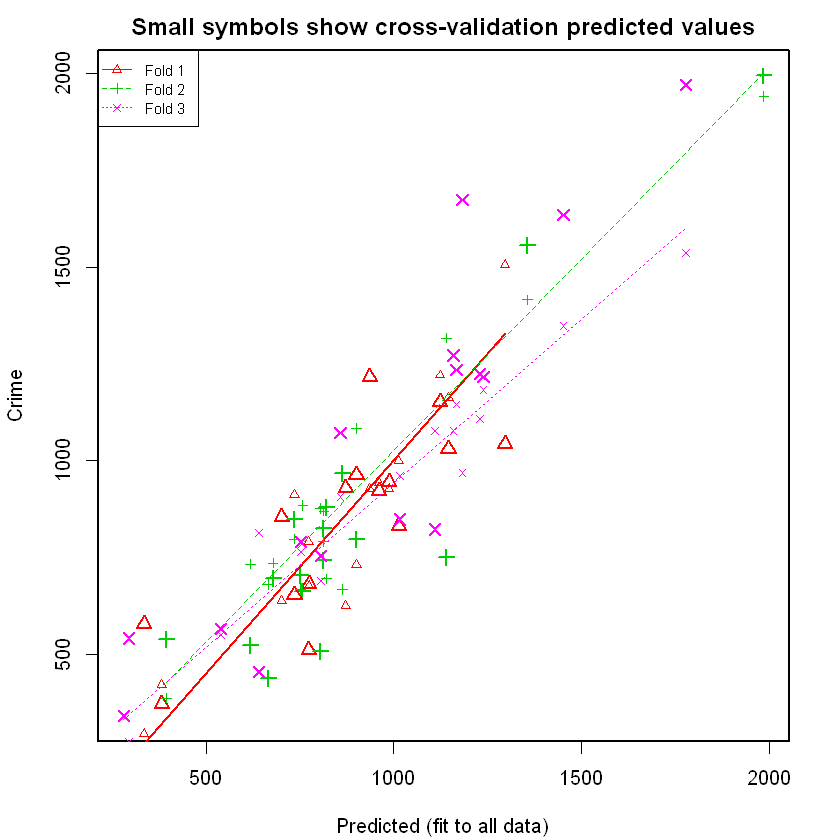

In [27]:
options(warn=-1)
# Cross Validating the model
cv.elastic.model <- cv.lm(Crime~M+So+Ed+Po1+Po2+M.F+Pop+NW+U1+U2+Wealth+Ineq+Prob, data = df, printit=FALSE)
# total sum of squared differences between data and its mean (SSE Total)
SStot <- sum((df$Crime - mean(df$Crime))^2)
# Calculate mean squared error, times number of data points, gives sum of squared errors
SSres_cv <- attr(cv.elastic.model,"ms")*nrow(df)
# Calculate CV R squared 
CV_R2 <- (1 - SSres_cv/SStot)

In [28]:
cat("Elastic Net model cross validated R2", round(CV_R2,3))

Elastic Net model cross validated R2 0.595

<p><p style="page-break-after:always;"></p></p>

<b> Conclusions </b>
1. All 3 greedy methods reached the same number of predictors (8 predictors).
2. LASSO Method reached 11 predictors.
3. Elastic Net Method (alpha=0.5) reached 13 predictors
4. Elastic Net Method (alpha=0) did not exclude any predictors (all 15 predictors had non-zero coefficients)

Optimizing the resulting models using coefficients p-values resulted in the same optimized model with 6 predictors regardless of the variable selection technique (M + Ed + Po1 + U2 + Ineq + Prob)

The table below show the summary of each method attempted and the Final model recommended from all Methods.


| Model | R2 | Adj-R2 | R2 cross-validated | # Predictors
| --- | --- | --- | --- | --- |
|Stepwise Model | 0.789 | 0.744 | 0.663 | 8 |
|LASSO Model | 0.773 | 0.701 | 0.538 | 11 |
|Rebuilt LASSO Model | 0.794 | 0.730 | 0.619 | 11 |
|Elastic Net Model (Alpha=0.5) | 0.785 | 0.717 | 0.532 | 13 |
|Rebuilt Elastic Net Model (Alpha=0.5) | 0.805 | 0.722 | 0.595 | 13 |
|Optimized Model from all methods | 0.766 | 0.731 | 0.677 | 6 |

Note that all models out-performed building a model using all predictors due to reducing over fitting effects (original model R2 0.80 and Adjusted R2 of 0.71 on training data with CV R2 of only 0.40)